########Image Classification Code for Cars and Trains#########
We will expand on the existing framework by adding code to classify images into categories like "car" and "train" using a pre-trained model (e.g., VGG16) and displaying the classified images with predictions.



In [3]:
# Load the pre-trained model (e.g., VGG16) without the top layer
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np



In [5]:
# Load the VGG16 model
model = VGG16(weights='imagenet')


Car Image Predictions:
Classifying image: 1987-buick-grand-national-gnx-003-front-3-4-1510332838.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1. pickup: 0.6029
2. jeep: 0.0978
3. tow_truck: 0.0540


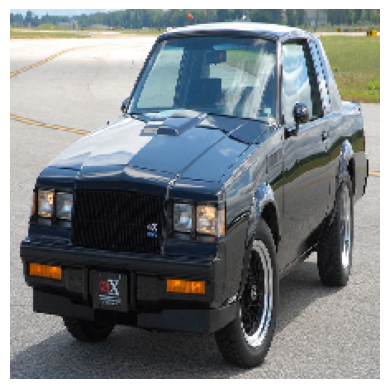

Classifying image: istockphoto-1270426808-612x612.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1. convertible: 0.5560
2. sports_car: 0.2340
3. grille: 0.1309


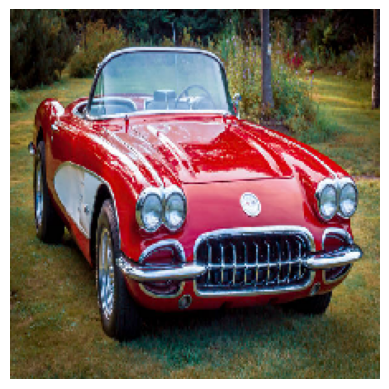

Classifying image: one-of-many-american-1950s-cars-cherished-in-the-cuban-capital-havana-AAY2BD.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1. convertible: 0.6464
2. beach_wagon: 0.1997
3. cab: 0.0447


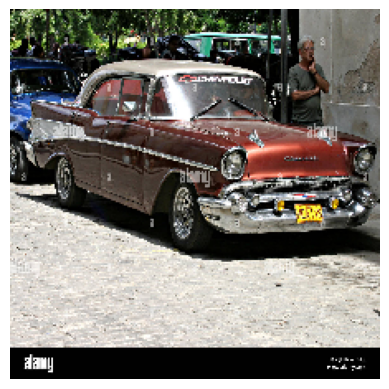


Train Image Predictions:
Classifying image: 20130607.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1. passenger_car: 0.8555
2. steam_locomotive: 0.0949
3. electric_locomotive: 0.0253


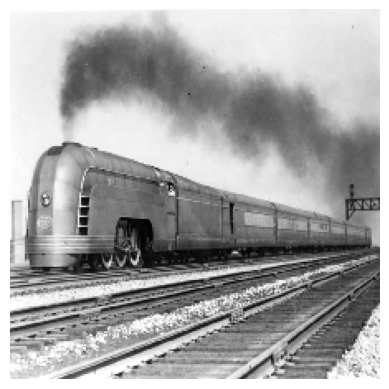

Classifying image: only-three-of-these-trains.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1. electric_locomotive: 0.7215
2. passenger_car: 0.1939
3. bullet_train: 0.0463


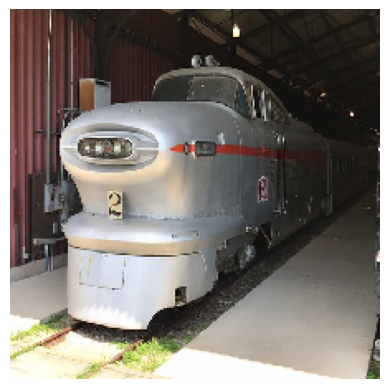

Classifying image: sddefault.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1. steam_locomotive: 0.9993
2. passenger_car: 0.0005
3. electric_locomotive: 0.0001


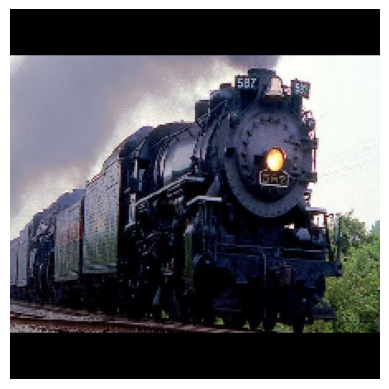

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions

# Function to load and preprocess the image
def load_and_prep_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Classify and display image with the prediction
def classify_and_display_image(img_path, model):
    img_array = load_and_prep_image(img_path)
    predictions = model.predict(img_array)
    predicted_classes = decode_predictions(predictions, top=3)[0]
    
    # Display the image
    img = image.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)
    plt.axis('off')
    
    # Print the top predicted classes
    for i, (imagenet_id, label, score) in enumerate(predicted_classes):
        print(f"{i+1}. {label}: {score:.4f}")
    plt.show()

# Loop through all images in the car and train folders
def classify_images_in_folder(folder_path, model):
    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)
        if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
            print(f"Classifying image: {img_file}")
            classify_and_display_image(img_path, model)

# Example usage: classify and display car and train images
car_image_folder = r'E:\Machine Learning Projects\object classification\Validation\cars'
train_image_folder = r'E:\Machine Learning Projects\object classification\Validation\Trains'

print("Car Image Predictions:")
classify_images_in_folder(car_image_folder, model)

print("\nTrain Image Predictions:")
classify_images_in_folder(train_image_folder, model)


##Code for Object Recognition using VGG16 (Transfer Learning)


In [19]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Define dataset paths
train_dir = r'E:\Machine Learning Projects\object classification\Train'  # Update with actual path
validation_dir = r'E:\Machine Learning Projects\object classification\Validation'  # Update with actual path
test_dir = r'E:\Machine Learning Projects\object classification\Test'  # Update with actual path

# ImageDataGenerator for data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for validation and test data

# Load data and create batches
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(224, 224),
                                                        batch_size=32,
                                                        class_mode='categorical')

# Load pre-trained VGG16 model + higher level layers
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of VGG16 so they are not trained
for layer in vgg_conv.layers:
    layer.trainable = False

# Create a new model with the VGG16 base and add custom layers on top
model = Sequential()

# Add the VGG16 base model
model.add(vgg_conv)

# Add new layers for object recognition
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(train_generator.num_classes, activation='softmax'))  # Output layer for classification

# Compile the model with corrected optimizer argument
model.compile(optimizer=Adam(learning_rate=0.001),  # Updated from `lr` to `learning_rate`
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // validation_generator.batch_size)

# Save the model
model.save('object_recognition_model.h5')

# Evaluate the model on test data
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(224, 224),
                                                  batch_size=32,
                                                  class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


Found 6 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,137,986 (80.64 MB)

 Trainable params: 6,423,298 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/10


C:\Users\admin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.5000 - loss: 0.8316 - val_accuracy: 0.5000 - val_loss: 2.3929
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.5000 - loss: 3.3643 - val_accuracy: 0.5000 - val_loss: 4.7555
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.5000 - loss: 5.6301 - val_accuracy: 0.6667 - val_loss: 1.2654
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.5000 - loss: 2.5533 - val_accuracy: 1.0000 - val_loss: 6.8697e-05
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 1.0000 - loss: 0.0048 - val_accuracy: 1.0000 - val_loss: 0.0644
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - accuracy: 0.5000 - loss: 0.7470 - val_accuracy: 1.0000 - val_loss: 0.0044
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 68s 68s/step - accuracy: 1.0000 - loss: 0.0858 - val_accuracy: 1.0000 - val_loss: 5.5068e-05
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.8333 - loss: 0.7816 - val_accuracy: 1.0000 - val_loss: 1.5895e-07

Found 6 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 1.0000 - loss: 1.9868e-08
Test Accuracy: 100.00%


####Code for Object Recognition using Custom CNN (Scratch)####


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Initialize the model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model.add(Flatten())

# Add fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))

# Output layer
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Compile the model with corrected optimizer argument
model.compile(optimizer=Adam(learning_rate=0.001),  # Updated from `lr` to `learning_rate`
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model (Use the same data generators as above)
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    epochs=20,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // validation_generator.batch_size)

# Evaluate on test data
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.5000 - loss: 0.6808 - val_accuracy: 0.6667 - val_loss: 0.7909
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3333 - loss: 1.4233 - val_accuracy: 0.5000 - val_loss: 5.4917
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 3.8850 - val_accuracy: 0.6667 - val_loss: 0.6361
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3333 - loss: 0.8081 - val_accuracy: 0.5000 - val_loss: 2.1232
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 1.3550 - val_accuracy: 0.5000 - val_loss: 1.2177
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 1.2246 - val_accuracy: 0.5000 - val_loss: 0.6382
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.7985 - val_accuracy: 0.8333 - val_loss: 0.6512
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8333 - loss: 0.6588 - val_accuracy: 0.6667 - val_loss: 0.6667
Epoch 9/20
1/1 ━